### Physics of Stars 
### ASTR 220A Winter 2021
### Homework 1
### Due January 22

## 1.)
Install MESA. Run the tutorial to make sure it works. 


### Plot the star's evolution on the H-R diagram.

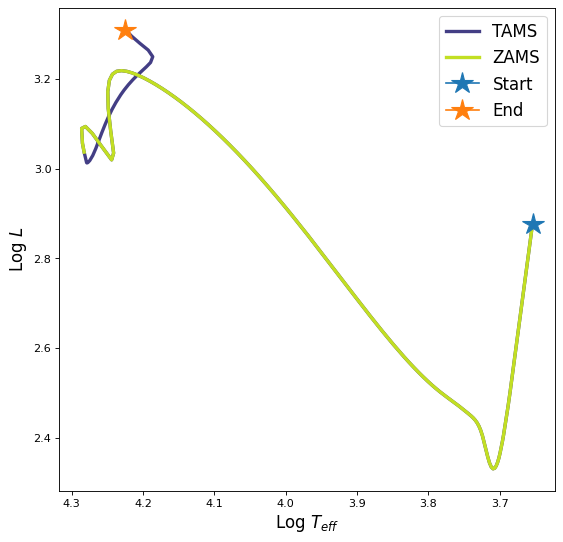

In [51]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np


filename_TAMS = '6Msun_TAMS/LOGS/history.data'
filename_ZAMS = '6Msun_ZAMS/LOGS/history.data'
data_TAMS = np.genfromtxt(filename_TAMS, skip_header = 5, names = True)
data_ZAMS = np.genfromtxt(filename_ZAMS, skip_header = 5, names = True)

viridis = cm.get_cmap("viridis", 12) # colormap
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger
ax.plot(data_TAMS['log_Teff'][:], data_TAMS['log_L'][:], color = viridis(0.2), linewidth = 3, label = "TAMS")
ax.plot(data_ZAMS['log_Teff'][0:], data_ZAMS['log_L'][0:], color = viridis(0.9), linewidth = 3, label = "ZAMS")
ax.invert_xaxis()

ax.plot(data_ZAMS['log_Teff'][0], data_ZAMS['log_L'][0], marker = '*', markersize = 20, label = "Start")
ax.plot(data_TAMS['log_Teff'][len(data_TAMS['log_Teff'])-1], data_TAMS['log_L'][len(data_TAMS['log_Teff'])-1], marker = '*', markersize = 20, label = "End")


ax.set_xlabel(r"Log $T_{eff}$", fontsize = 15)
ax.set_ylabel(r"Log $L$", fontsize = 15)
plt.legend(fontsize = 15)

### Plot the $\rho-T $ diagram of TAMS. 

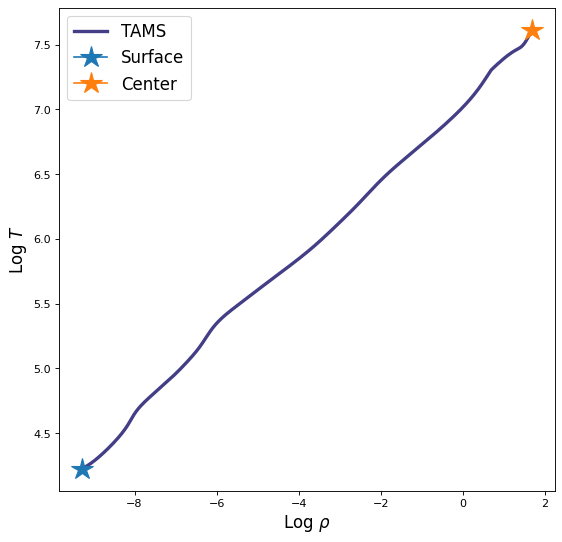

In [148]:
import py_mesa_reader.mesa_reader as mr
filename_TAMS_profile = '6Msun_TAMS/LOGS/profile20.data' #last profile
data_TAMS_profile = mr.MesaData(filename_TAMS_profile)

filename_ZAMS_profile = '6Msun_ZAMS/LOGS/profile15.data' #last profile
data_ZAMS_profile = mr.MesaData(filename_ZAMS_profile)

fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger
ax.plot(data_TAMS_profile.logRho, data_TAMS_profile.logT, color = viridis(0.2), linewidth = 3, label = "TAMS")

# in principle the lowest density and temp should be at the surface, and the highest should be at the center... 
ax.plot(np.min(data_TAMS_profile.logRho), np.min(data_TAMS_profile.logT), marker = '*', markersize = 20, label = "Surface")
ax.plot(np.max(data_TAMS_profile.logRho), np.max(data_TAMS_profile.logT), marker = '*', markersize = 20, label = "Center")


ax.set_xlabel(r"Log $\rho$", fontsize = 15)
ax.set_ylabel(r"Log $T$", fontsize = 15)
plt.legend(fontsize = 15)

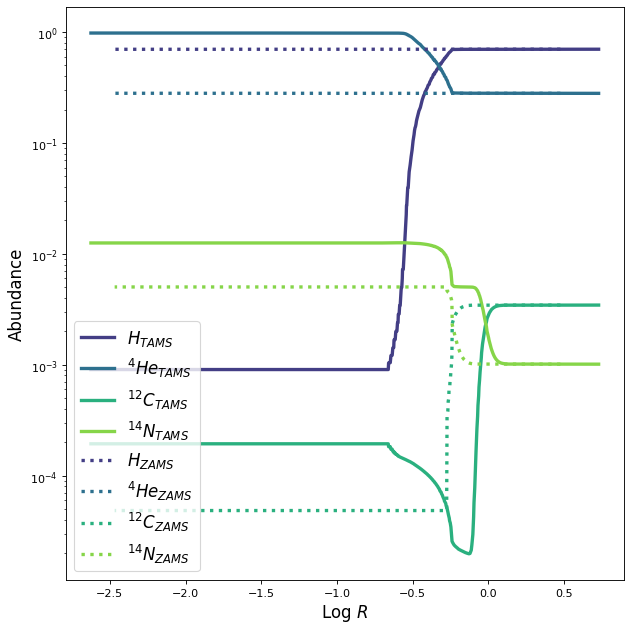

In [145]:
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger
ax.plot(data_TAMS_profile.logR, data_TAMS_profile.h1, color = viridis(0.2), linewidth = 3, label = r"$H_{TAMS}$")
ax.plot(data_TAMS_profile.logR, data_TAMS_profile.he4, color = viridis(0.4), linewidth = 3, label = r"$^{4}He_{TAMS}$")
ax.plot(data_TAMS_profile.logR, data_TAMS_profile.c12, color = viridis(0.6), linewidth = 3, label = r"$^{12}C_{TAMS}$")
ax.plot(data_TAMS_profile.logR, data_TAMS_profile.n14, color = viridis(0.8), linewidth = 3, label = r"$^{14}N_{TAMS}$")

ax.plot(data_ZAMS_profile.logR, data_ZAMS_profile.h1, color = viridis(0.2), linestyle = ':', linewidth = 3, label = r"$H_{ZAMS}$")
ax.plot(data_ZAMS_profile.logR, data_ZAMS_profile.he4, color = viridis(0.4), linewidth = 3, linestyle = ':', label = r"$^{4}He_{ZAMS}$")
ax.plot(data_ZAMS_profile.logR, data_ZAMS_profile.c12, color = viridis(0.6), linewidth = 3, linestyle = ':', label = r"$^{12}C_{ZAMS}$")
ax.plot(data_ZAMS_profile.logR, data_ZAMS_profile.n14, color = viridis(0.8), linewidth = 3, linestyle = ':', label = r"$^{14}N_{ZAMS}$")


ax.set_yscale('log')
ax.set_xlabel(r"Log $R$", fontsize = 15)
ax.set_ylabel(r"Abundance", fontsize = 15)
plt.legend(fontsize = 15)
plt.tight_layout()

The element abundancies change due to the different types of burning going on while a star is in ZAMS and while it is in TAMS. During TAMS, midsized stars have exhausted the hydrogen in their cores as can be seen by the dramatically lower value of H_TAMS when compared to H_ZAMS at small R. In the core, H was converted into 4He, as indicated by the increase of 4He from ZAMS to TAMS. In TAMS, the abunance of H is limited to the outer shell, as shown by the increase in H_TAMS -0.7 < Log(R) < -0.4. The abunance of heavier elements is also higher during TAMS. 


## 2.) 
Make a simple _Gaia_ query that includes all stars in the direction of M67. The radius of M67 is ~ 40 arcmin. 

For my query, I have chosen 80 arcmin. The query must include: parallax, distance, proper motions ($\mu_{RA}$ vs $\mu_{Dec}$), absolute magnitude in _Gaia G_ band ($M_G$)

## ADQL Query

SELECT TOP 2000 gaia_source.source_id,gaia_source.parallax,gaia_source.parallax_error,gaia_source.parallax_over_error,gaia_source.pmra,gaia_source.pmra_error,gaia_source.pmdec,gaia_source.pmdec_error,gaia_source.phot_g_mean_mag,gaia_source.bp_rp,gaia_source.dr2_radial_velocity,gaia_source.dr2_radial_velocity_error
FROM gaiaedr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiaedr3.gaia_source.ra,gaiaedr3.gaia_source.dec),
	CIRCLE(
		'ICRS',
		COORD1(EPOCH_PROP_POS(132.825,11.8,1.1325,-10.9737,-2.9396,33.9200,2000,2016.0)),
		COORD2(EPOCH_PROP_POS(132.825,11.8,1.1325,-10.9737,-2.9396,33.9200,2000,2016.0)),
		1.3333333333333333)
)=1

In [93]:
# import functions
import csv
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle
from scipy.stats import gaussian_kde
%matplotlib inline


# import data
filename = '1611434158701O-result.csv'
m67_data = pd.read_csv(filename)
m67_data = m67_data.fillna(0) # since there are a ton of empty values, fill them in with 0 

In [3]:
# first, let's remove "0" value parallaxes 
m67_data_1c = m67_data[m67_data['parallax'] != 0] # first cut

# and sources with untrustworthy parallaxes 
m67_data_2c = m67_data_1c[m67_data_1c['parallax_over_error'] > 5] # second cut

### Identify the "overdensity" in the parallax distribution of the sources.

The parallax distribution peaks at: 0.89 mas.
The FWHM of the parallax distribution is: 1.33 mas.


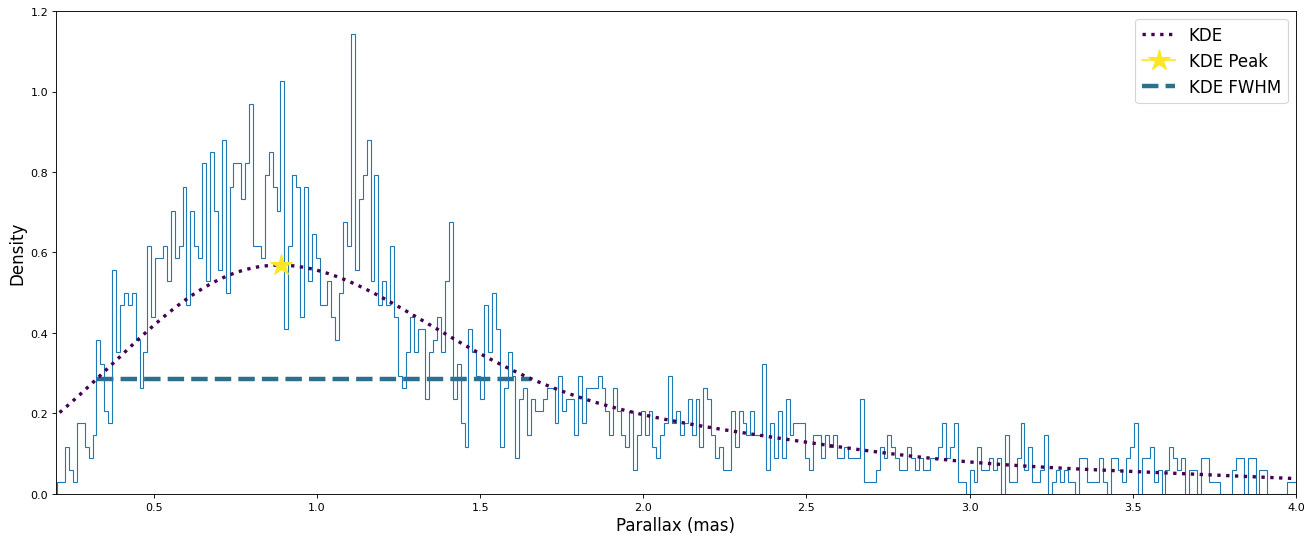

In [145]:
viridis = cm.get_cmap("viridis", 12) # colormap
fig, ax = plt.subplots(figsize=(20,8),dpi=80) # make figure larger 

# plot total parallax histogram for all Gaia stars in the direction of M67
n, bins, patches = plt.hist(m67_data_2c.parallax, bins = 500, range = (0,6), density = True, histtype = 'step')

# create and plot gaussian kde for parallax data, this is so I can better identify "peak"
kde = gaussian_kde(m67_data_2c.parallax)
x = np.linspace(m67_data_2c.parallax.min(), m67_data_2c.parallax.max(), 2000)
y = kde(x)
ax.plot(x,y, color = viridis(0.04), ls = ':', lw = 3, label = "KDE")

# identify and plot peak of kde 
peak = np.argmax(y)
ax.plot(x[peak], y[peak], label = "KDE Peak", marker = "*", markersize = 20, color = viridis(0.95))

# identify and plot FWHM of kde
half_max = y[peak]/2
left_pos = np.argmin((np.abs(y[:peak] - half_max)))
right_pos = np.argmin((np.abs(y[peak:] - half_max))) + peak
fwhm = x[right_pos] - x[left_pos]
ax.hlines(half_max, x[left_pos], x[right_pos], color=viridis(0.4), ls='dashed', lw = 4, label = "KDE FWHM")


ax.set_xlim(0.2,4);
ax.set_xlabel("Parallax (mas)", fontsize = 15)
ax.set_ylabel("Density", fontsize = 15)
ax.legend(fontsize = 15)

print("The parallax distribution peaks at: %.2g mas." % x[peak])
print("The FWHM of the parallax distribution is: %.3g mas." % fwhm)

Suppose the parallax of our sample of sources follows a Gaussian distribution. The peak of a Gaussian function is the mean of the distribution. So, on average, this sample has a parallax of 0.59 mas. Here, the full width at half maximum (FWHM) was arbitrarily chosen to represent the width of the distribution. It encompasses sources within 2.35$\sigma$ of the peak of the parallax distribution.

### Determine the "best" distance.
To determine the distance to M67, we will use the peak of our parallax distribution and the FWHM. 

The relationship between parallax and distance is expressed as follows: 

$distance = parallax^{-1}$

In [130]:
# calculate best distance and range

x_as = x[peak]/1000 # convert to arcsec
distance = 1/x_as # best distance in arcsec

x_left_as = x[left_pos]/1000
x_right_as = x[right_pos]/1000
distance_left = 1/x_left_as
distance_right = 1/x_right_as
spread_left = np.abs(distance - distance_left)
spread_right = np.abs(distance - distance_right)

print("The best distance to M67 is: %.6g pc." % distance)
print("With a spread of +%.6g pc and -%.6g pc." % (spread_right, spread_left))

The best distance to M67 is: 1124.9 pc.
With a spread of +521.117 pc and -1931.07 pc.


Although a negative distance is clearly unphysical, I will still keep those sources in the ongoing analysis. 

In [131]:
# now, we select only sources within the distance range above...
m67_data_3c = m67_data_2c[m67_data_2c['parallax'] > x[left_pos]]  # third cut
m67_data_4c = m67_data_3c[m67_data_3c['parallax'] < x[right_pos]] # technically fourth cut

Text(0, 0.5, 'Density')

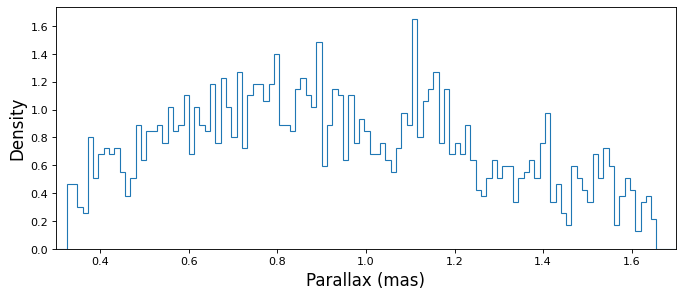

In [135]:
# plot the latest cut, sources within the best distance range (this is solely for me to confirm I actually made the right cut)
fig, ax = plt.subplots(figsize=(10,4),dpi=80) # make figure larger
n, bins, patches = plt.hist(m67_data_4c.parallax, bins = 500, range = (0,6), density = True, histtype = 'step')

ax.set_xlim(0.3,1.7);
ax.set_xlabel("Parallax (mas)", fontsize = 15)
ax.set_ylabel("Density", fontsize = 15)
#ax.legend(fontsize = 15)

### Plot the proper motions ($\mu_{RA}$ vs $\mu_{Dec}$). 

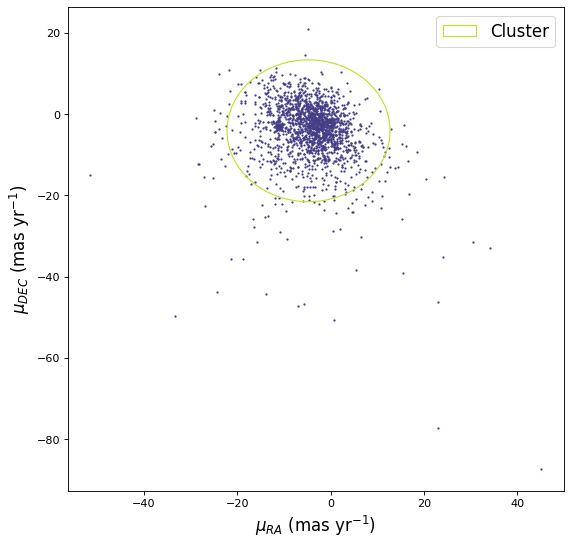

In [121]:
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger

# plot a circle around cluster
points = np.c_[m67_data_4c.pmra, m67_data_4c.pmdec]
mean = np.mean(points, axis = 0)
distance = points - mean 
radius = np.max(np.sqrt(distance[:,0]**2 + distance[:,1]**2))
circle = Circle(mean, radius = (radius*0.18), ec = viridis(0.9), fc = "none", label = "Cluster")

# select points within circle
cluster = circle.contains_points(points)

ax.add_patch(circle)
ax2 = ax.scatter(m67_data_4c.pmra, m67_data_4c.pmdec, s = 1, color = viridis(0.2))

ax.set_xlabel(r"$\mu_{RA}$ (mas yr$^{-1}$)", fontsize = 15)
ax.set_ylabel(r"$\mu_{DEC}$ (mas yr$^{-1}$)", fontsize = 15)
ax.legend(fontsize = 15)

In [95]:
# now, only selecting points within the cluster identified above
m67_data_5c = m67_data_4c[cluster == True]  # fifth cut

### Make a color-magnitude diagram. 
Plot $M_G$ as a function of $(BP-RP)_0$. 

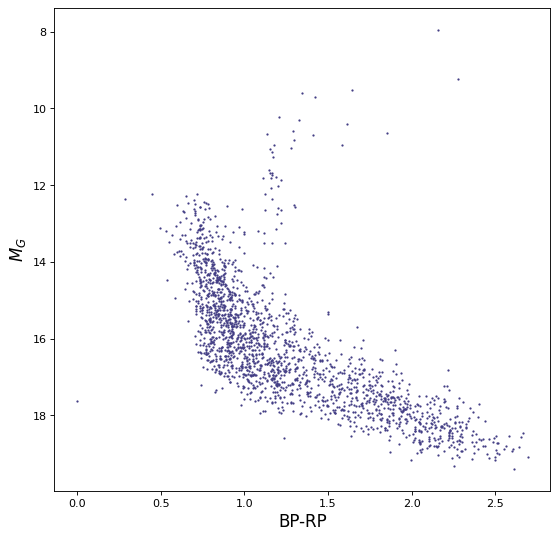

In [137]:
# plot bp-rp and M_g of cluster above
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger

ax2 = ax.scatter(m67_data_5c.bp_rp, m67_data_5c.phot_g_mean_mag, s = 1, color = viridis(0.2))

ax.set_xlabel(r"BP-RP", fontsize = 15)
ax.set_ylabel(r"$M_G$", fontsize = 15)
ax.invert_yaxis()

#ax.legend(fontsize = 15)

Although this is very reminiscent of the M67 CMD, it seems like I didn't select the right cluster! Zooming into the proper motions plot shown earlier reveals a much tinier cluster! 

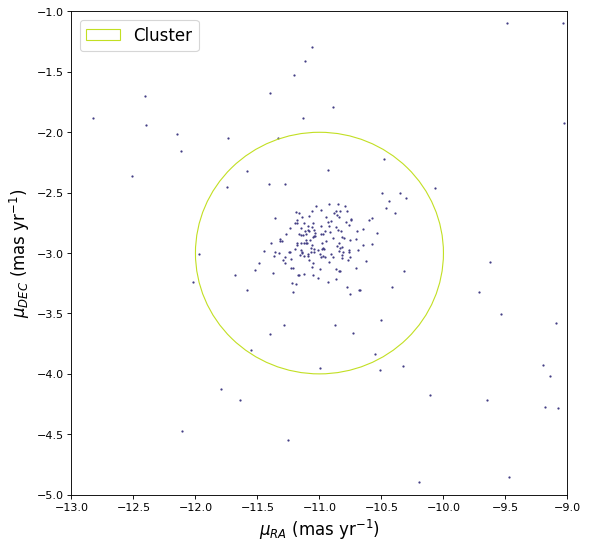

In [127]:
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger

# plot a circle around smaller cluster
circle = Circle((-11, -3), radius = 1, ec = viridis(0.9), fc = "none", label = "Cluster")
cluster = circle.contains_points(points)

ax.add_patch(circle)
ax2 = ax.scatter(m67_data_4c.pmra, m67_data_4c.pmdec, s = 1, color = viridis(0.2))

ax.set_xlim(-13, -9)
ax.set_ylim(-5, -1)
ax.set_xlabel(r"$\mu_{RA}$ (mas yr$^{-1}$)", fontsize = 15)
ax.set_ylabel(r"$\mu_{DEC}$ (mas yr$^{-1}$)", fontsize = 15)
ax.legend(fontsize = 15)

In [148]:
# now, only selecting points within the cluster identified above
m67_data_6c = m67_data_4c[cluster == True]  # sixth cut

197


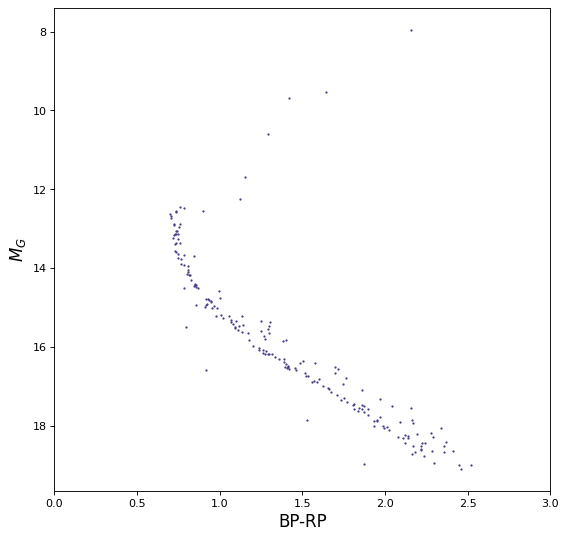

In [147]:
# plot bp-rp and M_g of cluster above
fig, ax = plt.subplots(figsize=(8,8),dpi=80) # make figure larger

ax2 = ax.scatter(m67_data_6c.bp_rp, m67_data_6c.phot_g_mean_mag, s = 1, color = viridis(0.2))

ax.set_xlim(0, 3)

ax.set_xlabel(r"BP-RP", fontsize = 15)
ax.set_ylabel(r"$M_G$", fontsize = 15)
ax.invert_yaxis()

#ax.legend(fontsize = 15)

Now, that's more like it! 

In [149]:
print("In total, %g stars compose the final CMD of M67." % len(m67_data_6c))

In total, 197 stars compose the final CMD of M67.
